# Hidden Markov Models

In [1]:
%matplotlib inline 

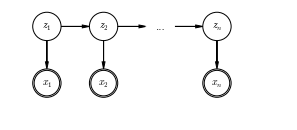

In [2]:
import daft

p_color = {"ec": "#ffffff"}

hmm = daft.PGM([5, 2.05], origin=[0.3, 0.3], observed_style="inner")

hmm.add_node(daft.Node("x1", r"$x_1$", 1, 1, observed = True))
hmm.add_node(daft.Node("z1", r"$z_1$", 1, 2))

hmm.add_node(daft.Node("x2", r"$x_2$", 2, 1, observed = True))
hmm.add_node(daft.Node("z2", r"$z_2$", 2, 2))

hmm.add_node(daft.Node("z3", "...", 3, 2, plot_params=p_color))

hmm.add_node(daft.Node("xn", r"$x_n$", 4, 1, observed = True))
hmm.add_node(daft.Node("zn", r"$z_n$", 4, 2))


hmm.add_edge("z1", "x1")
hmm.add_edge("z2", "x2")
hmm.add_edge("zn", "xn")

hmm.add_edge("z1", "z2")

hmm.add_edge("z2", "z3")
hmm.add_edge("z3", "zn")



hmm.render()



## Joint Distribution

$ p(x_1, x_2, ..., x_n, z_1, z_2, ... z_n) = p(z_1)p(x_1 | z_1)\prod_{k=2}^{n} p(z_k | z_{k-1})p(x_k | z_k)$ 



## Introduction
HMMs are widely used for modeling time series. Used in Speech recognition, data compression, computer vision and data science.

These represent probability distributions over sequences of observations. So observation $x_k$ is generated by a process whose state $z_k$ is hidden. The hidden state observes the *Markov property*, given value $z_{t-1}$, the current state is independent of states prior to $t-1$. i.e the last state defines all we need to know in order to predict future observations. The obeservations also obey the *Markov property* that they depned only on state $z_t$. These assumptionas allow the model to be factored in a way as above. The state $z_k$ can take discrete values.

To define the probability distribution we need to specify the initial state $P(z_1)$, the $S x S$ matrix state transition matrix, where S is the number of states, and the output model $P(x_k | z_k)$. Normaly the assumption that the STM and output model are not dependent on k i.e. is *time invariant* . If the $xs$ take discrete values these can be modeld by a $n x L$ observation matrix.

For real values observations $P(x_k | z_k)$ can be modelled in many ways, such as Gaussian, mixture of Gaussians or neural nets. 